In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import shap

In [6]:
dados=pd.read_csv("dados//diabetes.csv")

In [7]:
dados.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X=dados.drop(["diabetes"], axis=1)
y=dados["diabetes"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [69]:
#model=LogisticRegression()
model=RandomForestClassifier()
#model=VotingClassifier(estimators=[("lr", LogisticRegression()),("ada", AdaBoostClassifier())])

In [70]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
explainer = shap.Explainer(model, X_train, check_additivity=False)

In [68]:
shap_values=explainer(X_test)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.480100, while the model output was 0.470000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [46]:
shap_values

.values =
array([[[ 2.78624996e-02, -2.78624999e-02],
        [ 1.43397973e-01, -1.43397975e-01],
        [ 1.59964248e-03, -1.59964271e-03],
        ...,
        [ 3.55148798e-02, -3.55148810e-02],
        [-9.46892831e-03,  9.46892890e-03],
        [ 6.02420218e-02, -6.02420235e-02]],

       [[-3.48521430e-02,  3.48521420e-02],
        [-2.66533092e-01,  2.66533089e-01],
        [-1.96092854e-02,  1.96092855e-02],
        ...,
        [-7.85392842e-02,  7.85392851e-02],
        [-2.81402380e-02,  2.81402381e-02],
        [-8.80783319e-02,  8.80783325e-02]],

       [[-8.95107138e-02,  8.95107126e-02],
        [-1.21559284e-01,  1.21559284e-01],
        [ 1.06445238e-02, -1.06445237e-02],
        ...,
        [ 1.05929997e-01, -1.05929999e-01],
        [-5.11857139e-02,  5.11857134e-02],
        [-4.54428568e-02,  4.54428569e-02]],

       ...,

       [[ 7.07261716e-04, -7.07261799e-04],
        [-2.43997020e-01,  2.43997019e-01],
        [-2.37261251e-04,  2.37261848e-04],
        

In [47]:
shap_values[0]

.values =
array([[ 0.0278625 , -0.0278625 ],
       [ 0.14339797, -0.14339797],
       [ 0.00159964, -0.00159964],
       [ 0.03039345, -0.03039345],
       [ 0.02685845, -0.02685845],
       [ 0.03551488, -0.03551488],
       [-0.00946893,  0.00946893],
       [ 0.06024202, -0.06024202]])

.base_values =
array([0.6639, 0.3361])

.data =
array([ 1.  , 90.  , 62.  , 12.  , 43.  , 27.2 ,  0.58, 24.  ])

In [48]:
shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [71]:
model.predict_proba(X_test.iloc[0, :].values.reshape(1, -1))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.99, 0.01]])

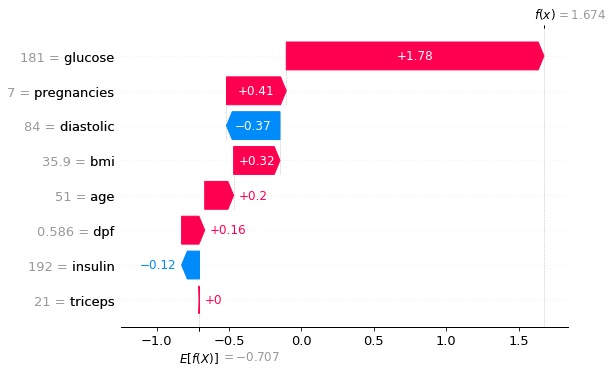

In [33]:
shap.plots.waterfall(shap_values[1])

In [32]:
logreg.predict_proba(X_test.iloc[1, :].values.reshape(1, -1))

X does not have valid feature names, but LogisticRegression was fitted with feature names


array([[0.15791415, 0.84208585]])

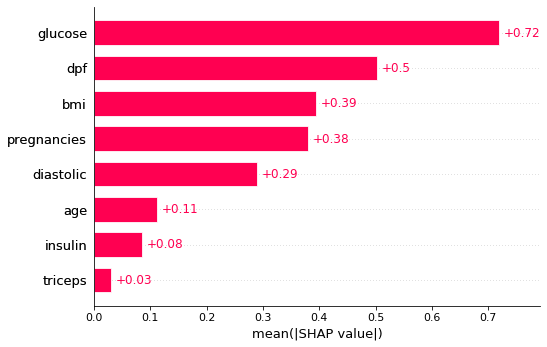

In [35]:
shap.plots.bar(shap_values)

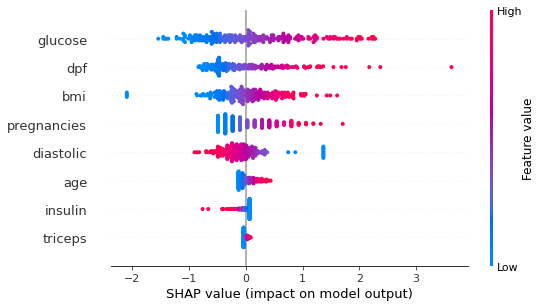

In [36]:
shap.plots.beeswarm(shap_values)